## 1.浮现上述代码

In [1]:
%matplotlib inline

import numpy as np
from PIL import Image
from matplotlib import pyplot as plt

import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

In [2]:
# 下载MNIST数据集并生成DataSet对象
# 使用OneHot编码处理标记
mnist = input_data.read_data_sets('/home/liuzixuan/机器学习/深度/小练习/MNIST_data', one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /home/liuzixuan/机器学习/深度/小练习/MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /home/liuzixuan/机器学习/深度/小练习/MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting /home/liuzixuan/机器学习/深度/小练习/MNIST_data/t10k-images-idx3-ubyte.gz
Extracting /home/liuzixuan/机器学习/深度/小练习/MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [3]:
# 训练集图片矩阵，代表55000张图片，每张图片为一个向量，其长度为784
mnist.train.images.shape

(55000, 784)

In [4]:
# 训练集标记矩阵，代表55000张图片的标记，每张图片为一个10维的独热编码向量
mnist.train.labels.shape

(55000, 10)

In [5]:
mnist.test.images.shape

(10000, 784)

In [6]:
mnist.test.labels.shape

(10000, 10)

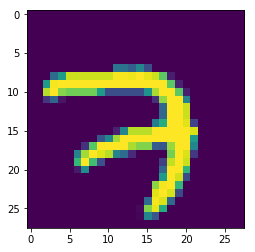

In [8]:
# 可视化训练集中的图片
plt.imshow((mnist.train.images[0] * 255).astype(np.uint8).reshape([28,28]))

In [9]:
mnist.train.labels[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

In [13]:
with tf.Graph().as_default() as g:
    # 输入、标记占位符
    inputs = tf.placeholder(shape=[None, 784], dtype=tf.float32)
    labels = tf.placeholder(shape=[None, 10], dtype=tf.float32)
    
    
    # 创建128个隐藏层神经元参数
    hidden_weight = tf.Variable(tf.random_normal([784, 128]), name='hidden_weight')
    hidden_bias = tf.Variable(tf.zeros([128, ]), name='hidden_bias')
    # 隐藏层前向传播
    hidden_output = tf.nn.relu(tf.matmul(inputs, hidden_weight) + hidden_bias)
    
    
    # 创建输出层10个神经元参数
    output_weight = tf.Variable(tf.random_normal([128, 10], name='output_weight'))
    output_bias = tf.Variable(tf.zeros([10, ]), name='output_bias')
    # 输出层前向传播
    logits = tf.matmul(hidden_output, output_weight) + output_bias
    output = tf.nn.softmax(logits)
    
    
    # 代价函数
    loss = tf.reduce_mean(-1 * tf.reduce_sum(
        labels * tf.log(output + 1e-7),
        axis=1))
    
    
    # 正确率
    acc = tf.reduce_mean(
        tf.cast(tf.equal(tf.argmax(labels, axis=1), tf.argmax(output, axis=1)),
                tf.float32))


with tf.Session(graph=g) as sess:
    # 定义梯度下降法优化器
    optim = tf.train.GradientDescentOptimizer(learning_rate=0.05)
    train_op = optim.minimize(loss)
    sess.run(tf.global_variables_initializer())
    
    # 训练模型
    for step in range(20000):
        batch_images, batch_labels = mnist.train.next_batch(32)
        res_loss, _ = sess.run([loss, train_op], feed_dict={
            inputs: batch_images,
            labels: batch_labels
        })
        
        # 输出代价并验证模型
        if step % 500 == 0:
            accs = []
            for test_step in range(10000 // 32):
                batch_images, batch_labels = mnist.test.next_batch(32)
                res_acc = sess.run(acc, feed_dict={
                    inputs: batch_images,
                    labels: batch_labels
                })
                accs.append(res_acc)
            accs = np.mean(accs)
            print('step %5d, loss %2.4f, acc %.4f' % (step, res_loss, accs))

step     0, loss 13.3114, acc 0.1266
step   500, loss 7.1982, acc 0.4700
step  1000, loss 5.5338, acc 0.5079
step  1500, loss 10.6723, acc 0.5208
step  2000, loss 6.0443, acc 0.5288
step  2500, loss 5.5125, acc 0.5280
step  3000, loss 6.4598, acc 0.5976
step  3500, loss 4.5332, acc 0.6111
step  4000, loss 6.0443, acc 0.6184
step  4500, loss 7.5522, acc 0.6232
step  5000, loss 4.5332, acc 0.7234
step  5500, loss 5.5946, acc 0.7247
step  6000, loss 4.0297, acc 0.7324
step  6500, loss 3.4816, acc 0.7319
step  7000, loss 4.0295, acc 0.7423
step  7500, loss 3.1338, acc 0.7386
step  8000, loss 3.2614, acc 0.7422
step  8500, loss 2.4449, acc 0.8014
step  9000, loss 2.1800, acc 0.8183
step  9500, loss 1.2255, acc 0.8189
step 10000, loss 2.5085, acc 0.8323
step 10500, loss 3.5261, acc 0.8265
step 11000, loss 2.9408, acc 0.8363
step 11500, loss 3.0084, acc 0.8294
step 12000, loss 1.7411, acc 0.8370
step 12500, loss 3.5258, acc 0.8359
step 13000, loss 0.5037, acc 0.8372
step 13500, loss 2.0148, a